# SPECTRA STUDIES

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import photopeak_fit as pk

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 1000

In [3]:
run = 6482

directory = './DATA/'
filename  = f'cepks_{run}_0000_11999_6q0min.h5'


data = pd.HDFStore(directory + filename)['/esum']

In [4]:
data.keys()

Index(['event', 'peak', 'location', 'nslices', 'nhits', 'noqslices', 'time',
       's1e', 't0', 'rmax', 'rsize', 'zmax', 'zsize', 'x0', 'y0', 'z0', 'e0',
       'q0', 'e0h', 'q0h', 'x', 'y', 'z', 'q', 'e', 'eh', 'qh', 'xu', 'yu',
       'zu', 'e0f', 'e0b', 'ef', 'eb', 'e1', 'x1', 'y1', 'z1', 'e2', 'x2',
       'y2', 'z2', 'eblob1', 'eblob2', 'd12'],
      dtype='object')

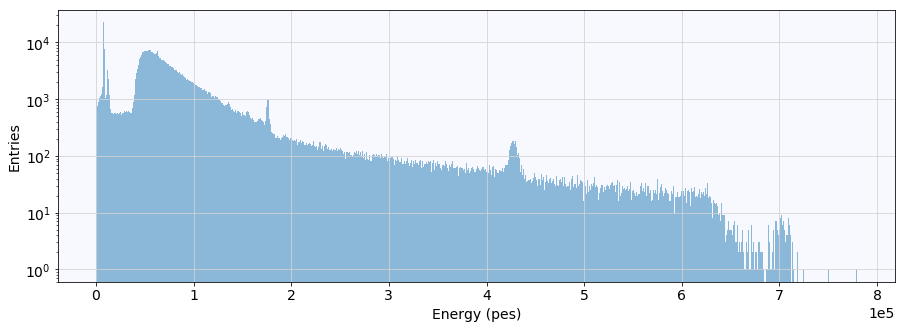

In [5]:
E = data[(data['e']<8e5)]['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=nbins, log=True, alpha=0.5);
ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Th double escape

In [44]:
a, b = 4.1e5, 4.45e5

thds = data[(a<data['e'])&(data['e']<b)]

In [45]:
E = thds['e']

#fit
ll, cov = pk.ll_func(E, [a, b])
x0 = np.array([len(E), len(E), 0, np.mean(E), np.std(E)])

In [46]:
from scipy.optimize import minimize
res = minimize(ll, x0, method='powell',
               options={'disp':True, 'maxiter':1e3})

In [42]:
res

   direc: array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])
     fun: array(inf)
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 6100
     nit: 100
  status: 2
 success: False
       x: array([4.01679290e+03, 4.01679290e+03, 2.58792896e+02, 4.27264757e+05,
       8.24193139e+03])

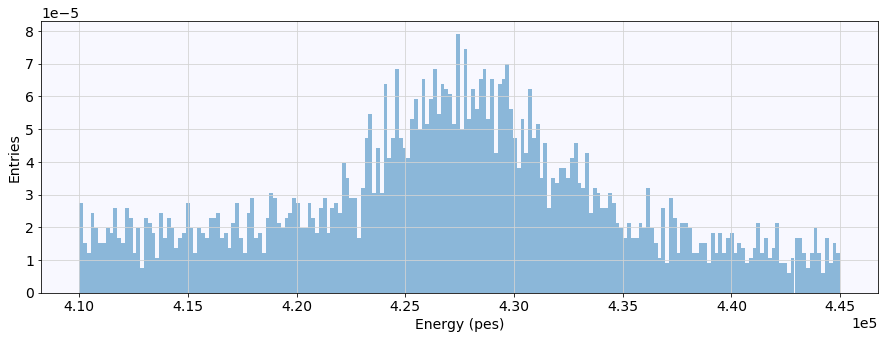

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(0.2*nbins), alpha=0.5, density=True);
e = np.linspace(a, b, 1000)
#ax.plot(e, pk.pkpdf(e, res.x, [a,b]))


ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');